# Group Project

### Members:
#### Arnav Chauhan
#### Hrithik Prakash Bokade
#### Pranav Mehta

### Importing the libraries

In [1]:
!pip install sentencepiece
!pip install colorama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.3 MB/s eta 0:00:00


In [2]:
!pip install GPUtil

import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    for obj in gc.get_objects():
        if torch.is_tensor(obj):
            del obj
    gc.collect()

    print("GPU Usage after emptying the cache")
    gpu_usage()

  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=3f3cd2dbac07709b1a3a2b02b333f0c64b16f9f138dfe078db05082fc9e7c5fa
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

import gc
import os
import time
import math
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date
from transformers import *
from sklearn.metrics import *
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

import os
import gc
import re
import string
import folium
from colorama import Fore, Back, Style, init

import math
import numpy as np
import scipy as sp
import pandas as pd

import random
import networkx as nx
from pandas import Timestamp

from PIL import Image
from IPython.display import SVG
from keras.utils import model_to_dot

import requests
from IPython.display import HTML

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

tqdm.pandas()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import transformers
import tensorflow as tf

from sklearn import metrics
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

import nltk
from textblob import TextBlob

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize

from xgboost import XGBClassifier

stopword=set(STOPWORDS)


lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

np.random.seed(0)
random_state = 29

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


### Importing the dataset

In [4]:
train = pd.read_csv("/content/train1.csv", encoding='latin-1')
test = pd.read_csv("/content/test1.csv", encoding='latin-1')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,2,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,3,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,4,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,5,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test.head()

,id,keyword,location,text
0,1,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,4,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,5,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### Preprocessing Data

#### Processing Abbreviations

In [7]:
# Processing Abbreviations in the Data
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

#### Text Processing

In [8]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)

# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)

# Factorize elongated words, add ELONG
def remove_elongated_words(text):
    rep = re.compile(r'\b(\S*?)([a-z])\2{2,}\b')
    return rep.sub(r'\1\2 ELONG', text)

# Factorize repeated punctuation, add REPEAT
def remove_repeat_punct(text):
    rep = re.compile(r'([!?.]){2,}')
    return rep.sub(r'\1 REPEAT', text)


# Remove all punctuations
def remove_all_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

# Remove punctuations
def remove_punct(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    if '...' not in text:
        text = text.replace('..', ' ... ')
    return text

# Remove all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords)])
    return text

In [9]:
def clean_tweet(text):

    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)

    # Lower text, replace abbreviations
    text = text.lower()
    text = replace_abbrev(text)
    text = remove_mention(text)
    text = remove_number(text)

    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)

    # Remove repeated puntuations / words
    text = remove_elongated_words(text)
    text = remove_repeat_punct(text)

    #text = remove_all_punct(text)
    #text = remove_punct(text)
    #text = remove_stopwords(text)

    return text

In [10]:
import string
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# Clean text and add a new feature
train["clean_text"] = train["text"].apply(clean_tweet)
test["clean_text"] = test["text"].apply(clean_tweet)

train["clean_tokens"] = train["clean_text"].apply(lambda x: word_tokenize(x))
test["clean_tokens"] = test["clean_text"].apply(lambda x: word_tokenize(x))

In [12]:
train[['clean_text','text']].head(10)

,clean_text,text
0,our deeds are the reason of this #earthquake m...,Our Deeds are the Reason of this #earthquake M...
1,forest fire near la ronge sask. canada,Forest fire near La Ronge Sask. Canada
2,all residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...
3,NUMBER people receive #wildfires evacuation or...,"13,000 people receive #wildfires evacuation or..."
4,just got sent this photo from ruby #alaska as ...,Just got sent this photo from Ruby #Alaska as ...
5,#rockyfire update => california hwy. NUMBER cl...,#RockyFire Update => California Hwy. 20 closed...
6,#flood #disaster heavy rain causes flash flood...,#flood #disaster Heavy rain causes flash flood...
7,i'm on top of the hill and i can see a fire in...,I'm on top of the hill and I can see a fire in...
8,there's an emergency evacuation happening now ...,There's an emergency evacuation happening now ...
9,i'm afraid that the tornado is coming to our a...,I'm afraid that the tornado is coming to our a...


### Vectorisation

In [13]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize  # Ensure you have imported word_tokenize from nltk

# Assuming 'clean_tokens' is a list of tokenized sentences
train["clean_tokens"] = train["text"].apply(lambda x: word_tokenize(x))
test["clean_tokens"] = test["text"].apply(lambda x: word_tokenize(x))

skip_gram_model = Word2Vec(sentences=train['clean_tokens'], vector_size=150, window=3, min_count=2, sg=1)
skip_gram_model.train(train['clean_tokens'], total_examples=len(train['clean_tokens']), epochs=10)

cbow_model = Word2Vec(sentences=train['clean_tokens'], vector_size=150, window=3, min_count=2)
cbow_model.train(train['clean_tokens'], total_examples=len(train['clean_tokens']), epochs=10)

def get_word_embeddings(token_list, vector, k=150):
    if len(token_list) < 1:
        return np.zeros(k)
    else:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in token_list]
    sum = np.sum(vectorized, axis=0)
    return sum/len(vectorized)

In [14]:
max_features=5000

def count_vector(data):
    count_vectorizer = CountVectorizer()
    vect = count_vectorizer.fit_transform(data)
    return vect, count_vectorizer

def tfidf_vector(data):
    tfidf_vectorizer = TfidfVectorizer()
    vect = tfidf_vectorizer.fit_transform(data)
    return vect, tfidf_vectorizer

def skip_gram_vectorizer(tokens,vector):
        embeddings = tokens.apply(lambda x: get_word_embeddings(x, skip_gram_model))
        return list(embeddings)

def cbow_vectorizer(tokens,vector):
        embeddings = tokens.apply(lambda x: get_word_embeddings(x, cbow_model))
        return list(embeddings)

In [15]:
X_train_skip_gram = [get_word_embeddings(tokens, skip_gram_model.wv) for tokens in train['clean_tokens']]
X_train_cbow = [get_word_embeddings(tokens, cbow_model.wv) for tokens in train['clean_tokens']]

X_test_skip_gram = [get_word_embeddings(tokens, skip_gram_model.wv) for tokens in test['clean_tokens']]
X_test_cbow = [get_word_embeddings(tokens, cbow_model.wv) for tokens in test['clean_tokens']]

X_train_skip_gram = np.array(X_train_skip_gram)
X_train_cbow = np.array(X_train_cbow)
X_test_skip_gram = np.array(X_test_skip_gram)
X_test_cbow = np.array(X_test_cbow)

In [16]:
import pickle

with open('skip_gram_model.pickle', 'wb') as handle:
    pickle.dump(skip_gram_model, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('cbow_model.pickle', 'wb') as handle:
    pickle.dump(cbow_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('cbow_model.pickle', 'wb') as handle:
    pickle.dump(cbow_model, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('cbow_model.pickle', 'wb') as handle:
    pickle.dump(cbow_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Models

In [17]:
metrics = pd.DataFrame(columns=['model' ,'vectoriser', 'f1 score', 'train accuracy','test accuracy'])

In [18]:
from joblib import dump

def fit_and_predict(model,x_train,x_test,y_train,y_test,vectoriser):
    classifier = model
    classifier_name = str(classifier.__class__.__name__)

    if classifier_name=="MultinomialNB" and (vectoriser=="skip gram vector" or vectoriser=="cbow vector"):
        return

    classifier.fit(x_train,y_train)
    filename = classifier_name +" using "+ str(vectoriser)+".joblib"
    filename = filename.lower().replace(" ","_")
    dump(model, filename=filename)
    y_pred = classifier.predict(x_test)
    cmatrix = confusion_matrix(y_test,y_pred)


    f,ax = plt.subplots(figsize=(3,3))
    sns.heatmap(cmatrix,annot=True,linewidths=0.5,cbar=False,linecolor="red",fmt='.0f',ax=ax)
    plt.xlabel("y_predict")
    plt.ylabel("y_true")
    ax.set(title=str(classifier))
    plt.show()


    f1score = f1_score(y_test,y_pred,average='weighted')
    train_accuracy = round(classifier.score(x_train,y_train)*100)
    test_accuracy =  round(accuracy_score(y_test,y_pred)*100)

    global metrics
    metrics = metrics.append({
                              'model': classifier_name,
                              'f1 score': f1score,
                              'train accuracy': train_accuracy,
                              'test accuracy': test_accuracy,
                              'vectoriser': str(vectoriser),
                             },
                               ignore_index=True
                            )

    print(str(classifier.__class__.__name__) +" using "+ str(vectoriser))
    print(classification_report(y_test,y_pred))
    print('Accuracy of classifier on training set:{}%'.format(train_accuracy))
    print('Accuracy of classifier on test set:{}%' .format(test_accuracy))

In [19]:
# Your list of models
models=[
        DecisionTreeClassifier(random_state = random_state),
        RandomForestClassifier(random_state=random_state),
        XGBClassifier(max_depth=6, n_estimators=1000),
        MultinomialNB(),
        KNeighborsClassifier(),
       ]

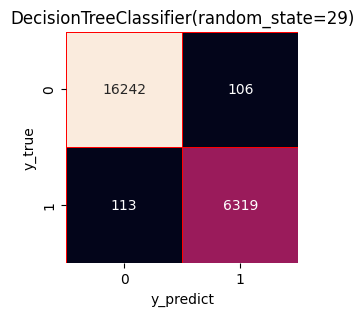

DecisionTreeClassifier using skip gram vector
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16348
           1       0.98      0.98      0.98      6432

    accuracy                           0.99     22780
   macro avg       0.99      0.99      0.99     22780
weighted avg       0.99      0.99      0.99     22780

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:99%


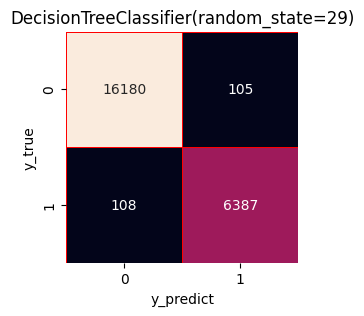

DecisionTreeClassifier using cbow vector
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16285
           1       0.98      0.98      0.98      6495

    accuracy                           0.99     22780
   macro avg       0.99      0.99      0.99     22780
weighted avg       0.99      0.99      0.99     22780

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:99%


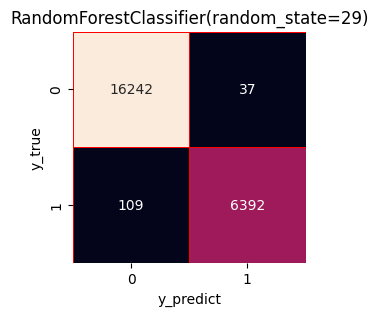

RandomForestClassifier using skip gram vector
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16279
           1       0.99      0.98      0.99      6501

    accuracy                           0.99     22780
   macro avg       0.99      0.99      0.99     22780
weighted avg       0.99      0.99      0.99     22780

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:99%


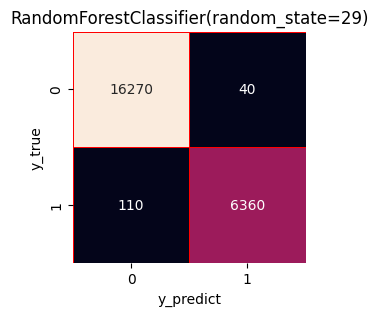

RandomForestClassifier using cbow vector
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16310
           1       0.99      0.98      0.99      6470

    accuracy                           0.99     22780
   macro avg       0.99      0.99      0.99     22780
weighted avg       0.99      0.99      0.99     22780

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:99%


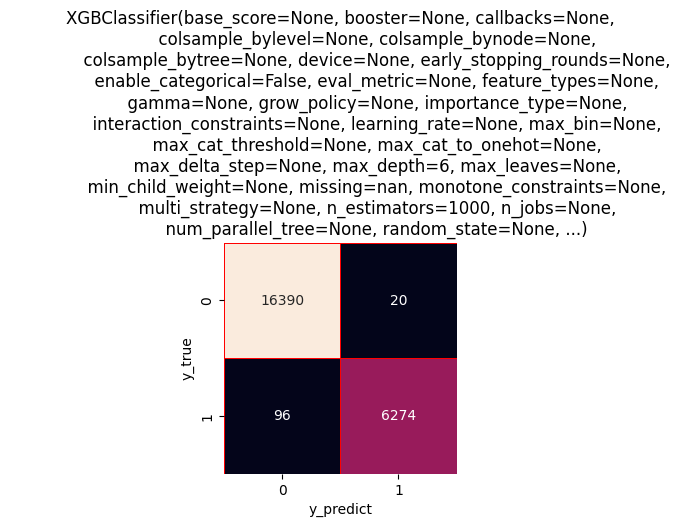

XGBClassifier using skip gram vector
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16410
           1       1.00      0.98      0.99      6370

    accuracy                           0.99     22780
   macro avg       1.00      0.99      0.99     22780
weighted avg       0.99      0.99      0.99     22780

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:99%


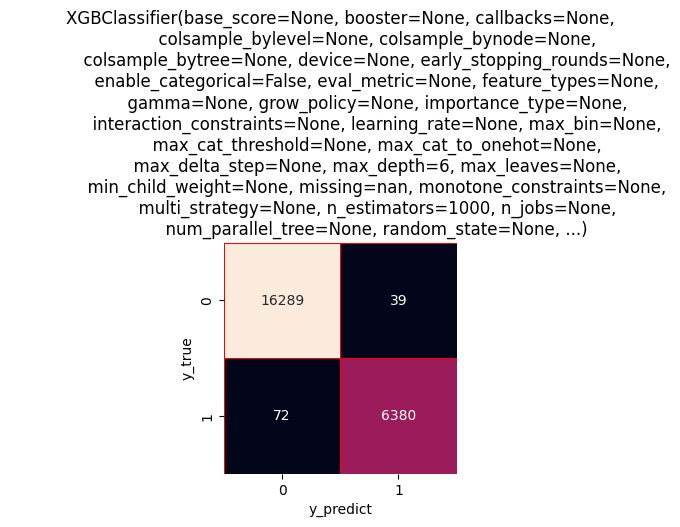

XGBClassifier using cbow vector
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16328
           1       0.99      0.99      0.99      6452

    accuracy                           1.00     22780
   macro avg       0.99      0.99      0.99     22780
weighted avg       1.00      1.00      1.00     22780

Accuracy of classifier on training set:100%
Accuracy of classifier on test set:100%


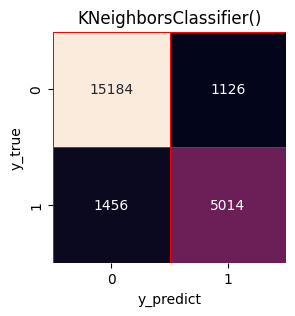

KNeighborsClassifier using skip gram vector
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     16310
           1       0.82      0.77      0.80      6470

    accuracy                           0.89     22780
   macro avg       0.86      0.85      0.86     22780
weighted avg       0.89      0.89      0.89     22780

Accuracy of classifier on training set:96%
Accuracy of classifier on test set:89%


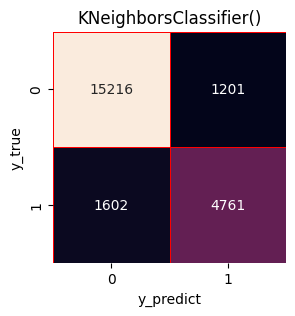

KNeighborsClassifier using cbow vector
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     16417
           1       0.80      0.75      0.77      6363

    accuracy                           0.88     22780
   macro avg       0.85      0.84      0.84     22780
weighted avg       0.88      0.88      0.88     22780

Accuracy of classifier on training set:96%
Accuracy of classifier on test set:88%


In [20]:
for model in models:
    y = train.target

    x = X_train_skip_gram
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    fit_and_predict(model, x_train, x_test, y_train, y_test, 'skip gram vector')

    x = X_train_cbow
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    fit_and_predict(model, x_train, x_test, y_train, y_test, 'cbow vector')


## ANN Approach

In [21]:
!pip install keras tensorflow

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

### Splitting the dataset again into the Training set and Test set

---



In [23]:
# Split the data into training and validation sets
X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(X_train_skip_gram, train['target'], test_size=0.2, random_state=random_state)

### Part 1: Build the ANN model


In [24]:
# Build the ANN model
model = Sequential()
model.add(Dense(256, input_dim=X_train_skip_gram.shape[1], activation='relu'))X_train_cbow
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

### Part 2: Compiling the model

In [25]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Part 3: Fitting and Predicting the Model

In [26]:
# Train the model
history = model.fit(X_train_ann, y_train_ann, validation_data=(X_val_ann, y_val_ann), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1899/1899 [==============================] - 7s 3ms/step - loss: 0.4151 - accuracy: 0.8223 - val_loss: 0.3799 - val_accuracy: 0.8361
Epoch 2/100
1899/1899 [==============================] - 7s 4ms/step - loss: 0.3737 - accuracy: 0.8427 - val_loss: 0.3600 - val_accuracy: 0.8457
Epoch 3/100
1899/1899 [==============================] - 7s 4ms/step - loss: 0.3498 - accuracy: 0.8536 - val_loss: 0.3478 - val_accuracy: 0.8515
Epoch 4/100
1899/1899 [==============================] - 6s 3ms/step - loss: 0.3276 - accuracy: 0.8630 - val_loss: 0.3140 - val_accuracy: 0.8688
Epoch 5/100
1899/1899 [==============================] - 7s 4ms/step - loss: 0.3087 - accuracy: 0.8716 - val_loss: 0.2951 - val_accuracy: 0.8764
Epoch 6/100
1899/1899 [==============================] - 8s 4ms/step - loss: 0.2865 - accuracy: 0.8810 - val_loss: 0.2789 - val_accuracy: 0.8837
Epoch 7/100
1899/1899 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.8894 - val_loss: 0.2583 - val_ac

### Evaluate the model on the test set

1129/1129 [==============================] - 2s 2ms/step - loss: 12.2009 - accuracy: 0.2706
Test Accuracy: 27.06%


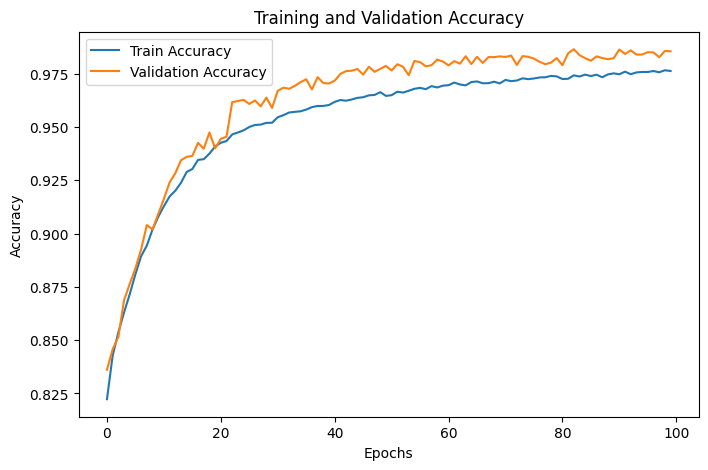

1129/1129 [==============================] - 2s 1ms/step - loss: 12.2009 - accuracy: 0.2706
Test Loss: 12.2009


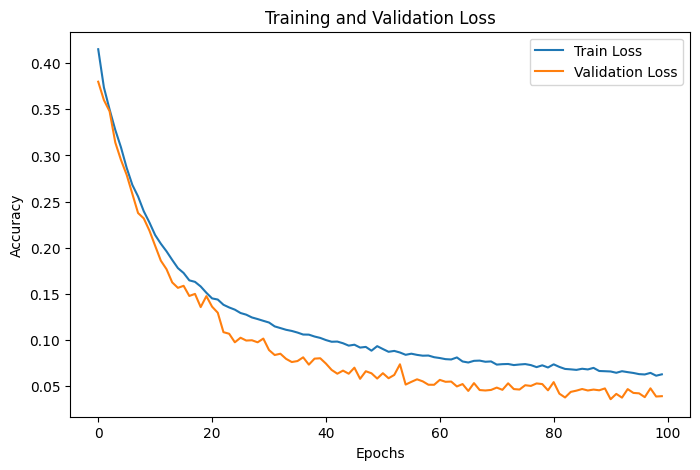

In [38]:
# Convert 'text' column to numerical values
test['clean_text'] = test['clean_text'].apply(lambda x: 0 if x == 'negative' else 1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_skip_gram, test['clean_text'])
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Convert 'text' column to numerical values
test['clean_text'] = test['clean_text'].apply(lambda x: 0 if x == 'negative' else 1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_skip_gram, test['clean_text'])
print(f'Test Loss: {test_loss:.4f}')

# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()